In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# 1. Load Data
# Pastikan Anda sudah mengunggah file BTC-EUR.csv ke folder 'content' di Colab
df = pd.read_csv('BTC-EUR.csv')

# 2. Parsing Tanggal & Set Index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# 3. Handling Missing Values (Interpolasi)
# Karena ini data runtun waktu, jika ada data kosong lebih baik diisi dengan nilai di sekitarnya
df = df.interpolate(method='time')

print("Pembersihan selesai. Data siap dianalisis!")
df.head()

Pembersihan selesai. Data siap dianalisis!


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389165
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560102
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736825
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702624


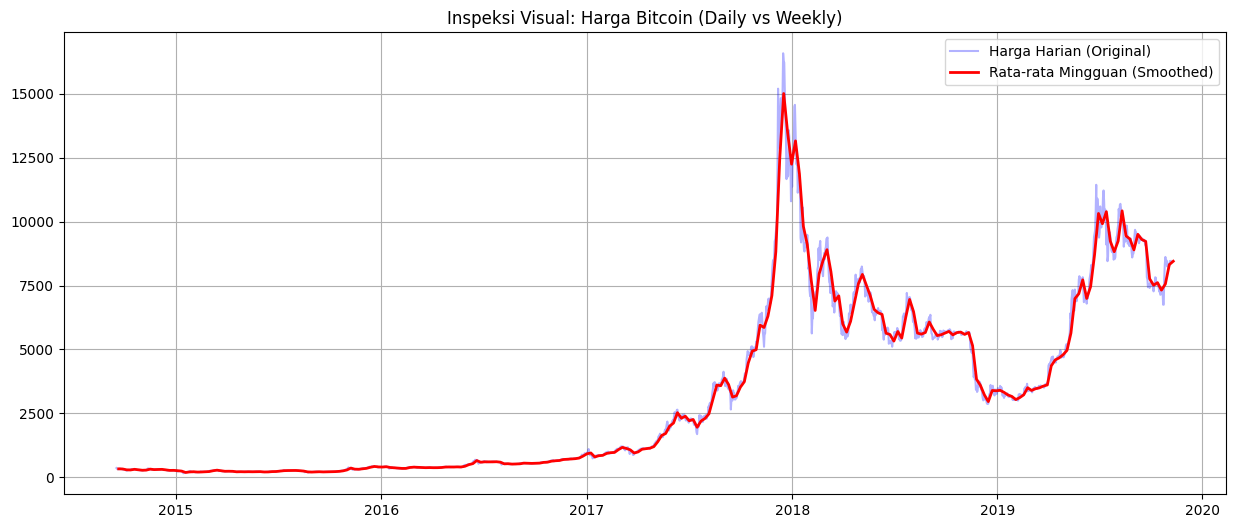

In [3]:
# Plot data asli vs Resampling Mingguan
plt.figure(figsize=(15, 6))
plt.plot(df['Close'], label='Harga Harian (Original)', alpha=0.3, color='blue')

# Resampling mingguan untuk melihat tren lebih jelas
weekly_data = df['Close'].resample('W').mean()
plt.plot(weekly_data, label='Rata-rata Mingguan (Smoothed)', color='red', linewidth=2)

plt.title('Inspeksi Visual: Harga Bitcoin (Daily vs Weekly)')
plt.legend()
plt.grid(True)
plt.show()

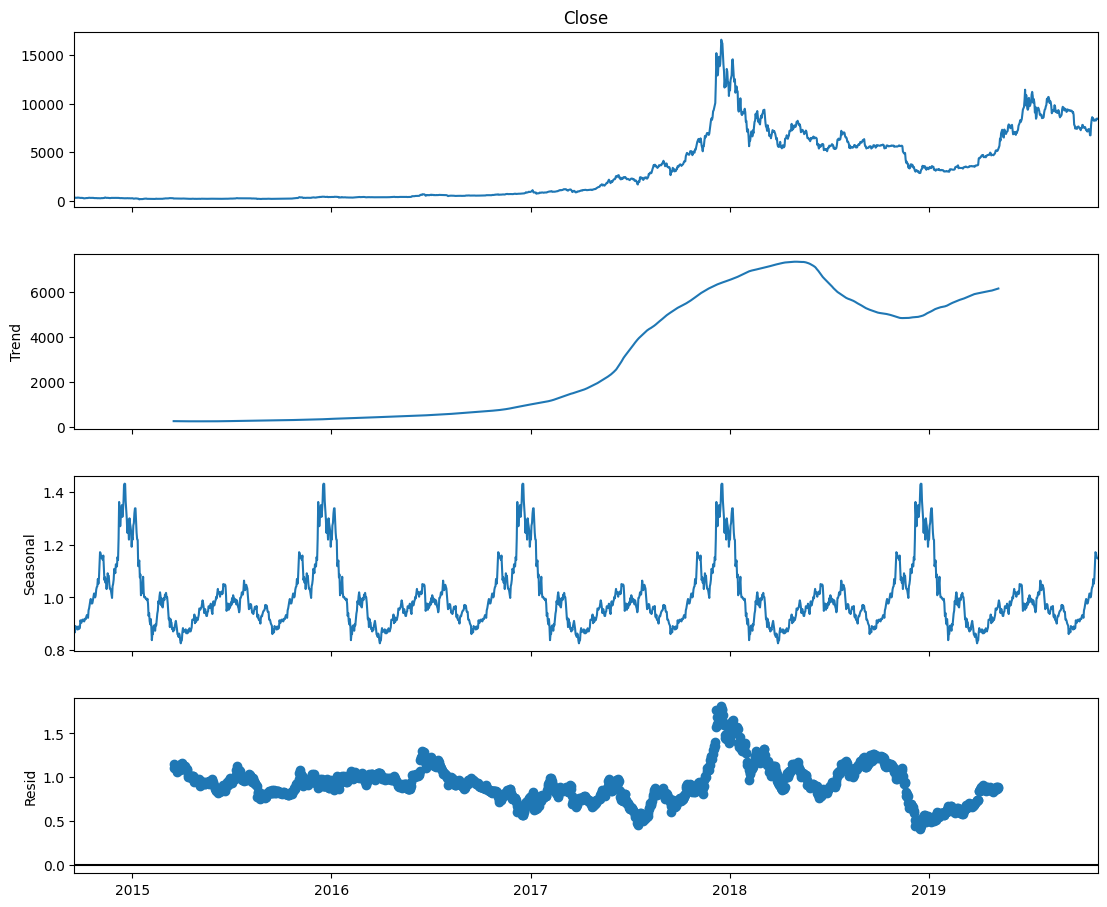

In [4]:
# Melakukan dekomposisi musiman (Model Multiplicative karena volatilitas kripto berubah seiring harga)
decomposition = seasonal_decompose(df['Close'], model='multiplicative', period=365)

fig = decomposition.plot()
fig.set_size_inches(12, 10)
plt.show()

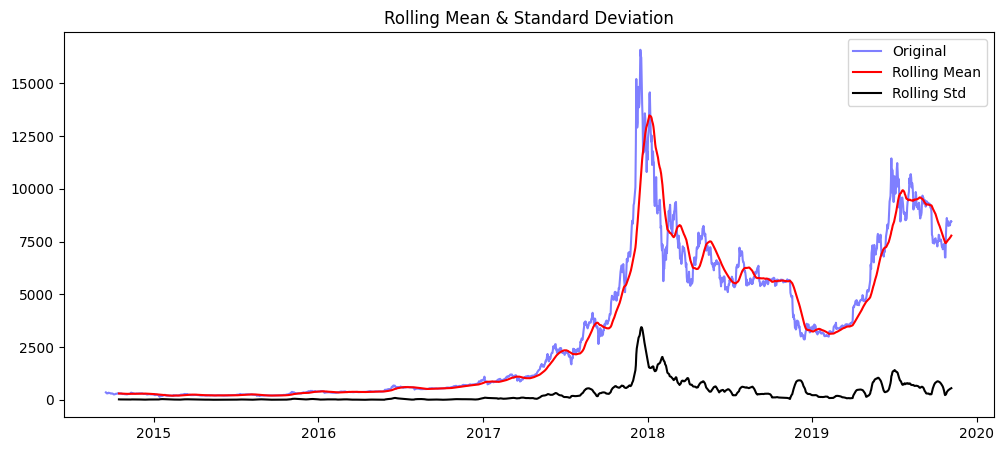

Hasil Uji Augmented Dickey-Fuller:
Test Statistic                   -1.537391
p-value                           0.514940
#Lags Used                       21.000000
Number of Observations Used    1855.000000
dtype: float64


In [5]:
# Fungsi untuk cek stasioneritas
def check_stationarity(timeseries):
    # Rolling Statistics
    rolmean = timeseries.rolling(window=30).mean()
    rolstd = timeseries.rolling(window=30).std()

    plt.figure(figsize=(12, 5))
    plt.plot(timeseries, color='blue', label='Original', alpha=0.5)
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    # Dickey-Fuller test
    print('Hasil Uji Augmented Dickey-Fuller:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print(dfoutput)

check_stationarity(df['Close'])